In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.20G/5.20G [02:14<00:00, 40.0MB/s]
100% 5.20G/5.20G [02:14<00:00, 41.5MB/s]


# Adding image path to the csv file

In [ ]:
!unzip /content/skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


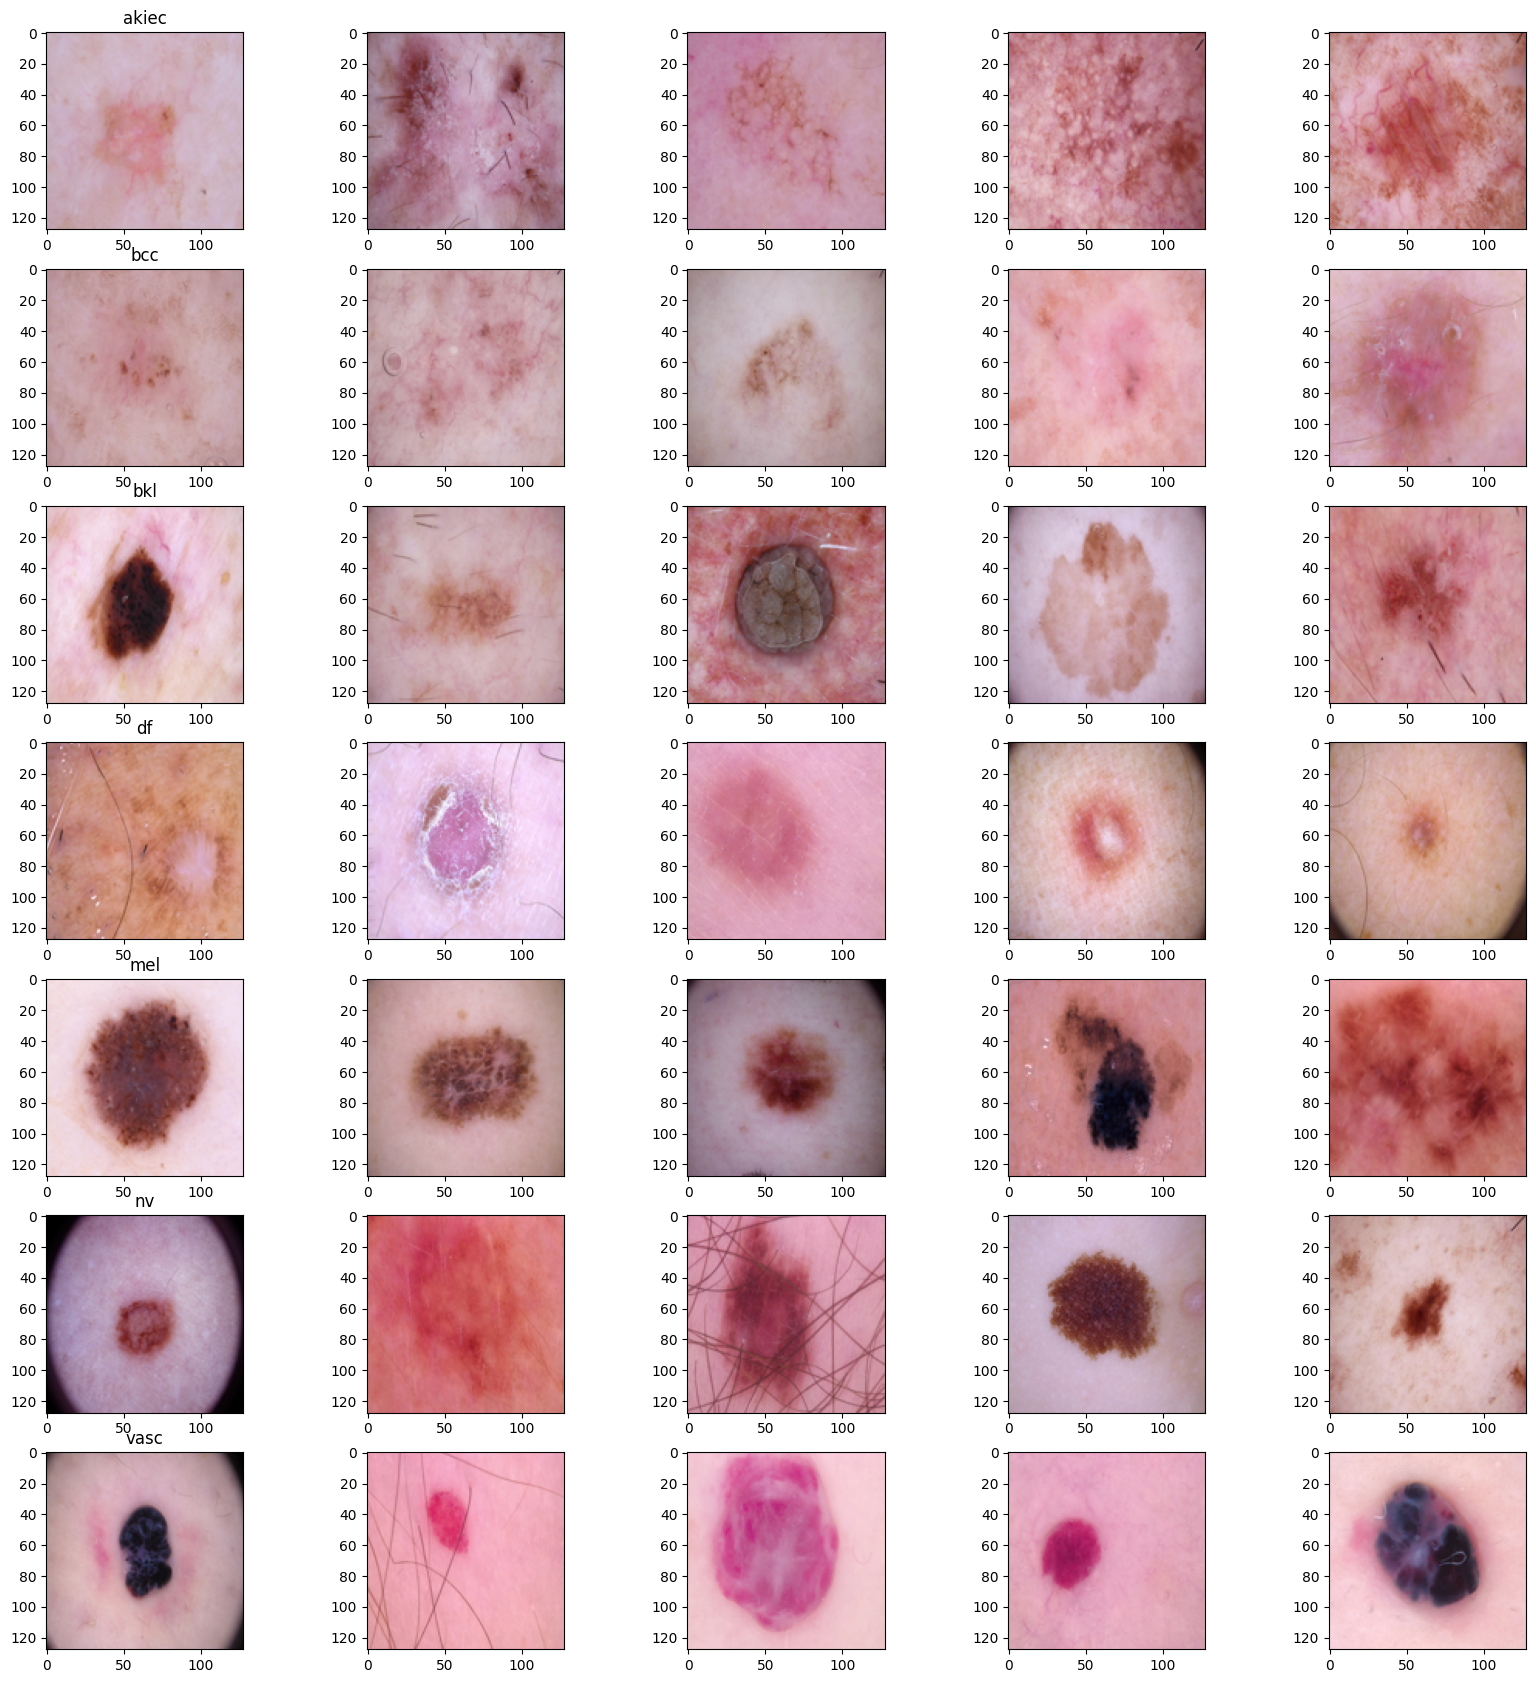

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

# Read CSV file
skin_df = pd.read_csv('/content/HAM10000_metadata.csv')

# Create a dictionary to map image IDs to file paths
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('*', '*.jpg'))}

# Update 'path' column with the corresponding file path (or empty string if not found)
skin_df['path'] = skin_df['image_id'].map(lambda x: image_path.get(x, ''))

# Filter out rows with empty paths (missing images)
skin_df = skin_df[skin_df['path'] != '']

# Use the path to read images
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128, 128))))

# Print value counts of different skin conditions
print(skin_df['dx'].value_counts())

# Number of samples for plotting
n_samples = 5

# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))
for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('on')

# Save the new DataFrame to a CSV file
skin_df.to_csv('/content/skin_df_updated.csv', index=False)

In [ ]:
file_path = '/content/skin_df_updated.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Display the contents of the DataFrame
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                      path  \
0  HAM10000_images_part_1/ISIC_0027419.jpg   
1  HAM10000_images_part_1/ISIC_0025030.jpg   
2  HAM10000_images_part_1/ISIC_0026769.jpg   
3  HAM10000_images_part_1/ISIC_0025661.jpg   
4  HAM10000_images_part_2/ISIC_0031633.jpg   

                                               image  
0  [[[189 152 194]\n  [192 156 199]\n  [191 154 1...  
1  [[[24 13 22]\n  [24 14 22]\n  [25 14 26]\n  .....  
2  [[[187 127 135]\n  [190 134 146]\n  [193 136 1...  
3  [[[24 11 17]\n  [24 11 19]\n  [29 15 25]\n  .....  
4  [[[129  87 109]\n  [141  96 119]\n  [151 106 1...

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization                                     path  \
1617             face  HAM10000_images_part_2/ISIC_0033272.jpg   
8128  lower extremity  HAM10000_images_part_2/ISIC_0031923.jpg   
2168             back  HAM10000_ima

<ipython-input-8-7f0f110f099b>:55: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


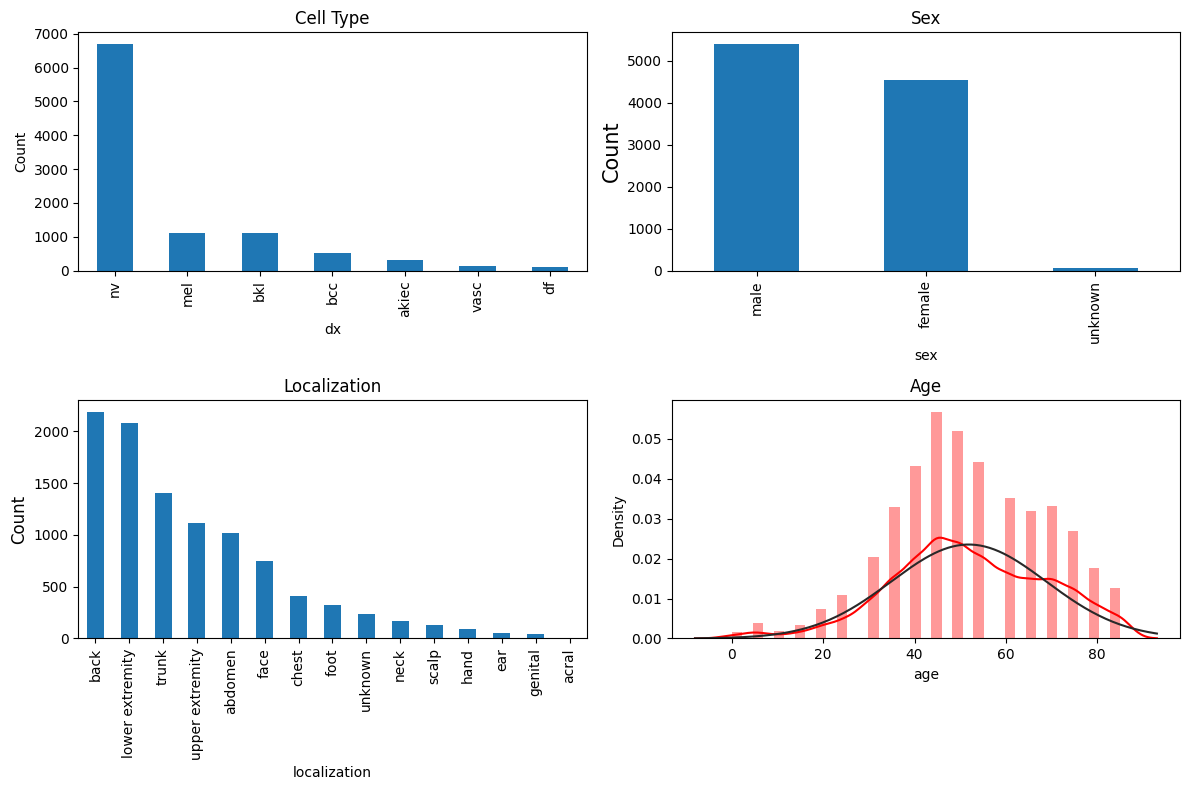

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64
label
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: count, dtype: int64


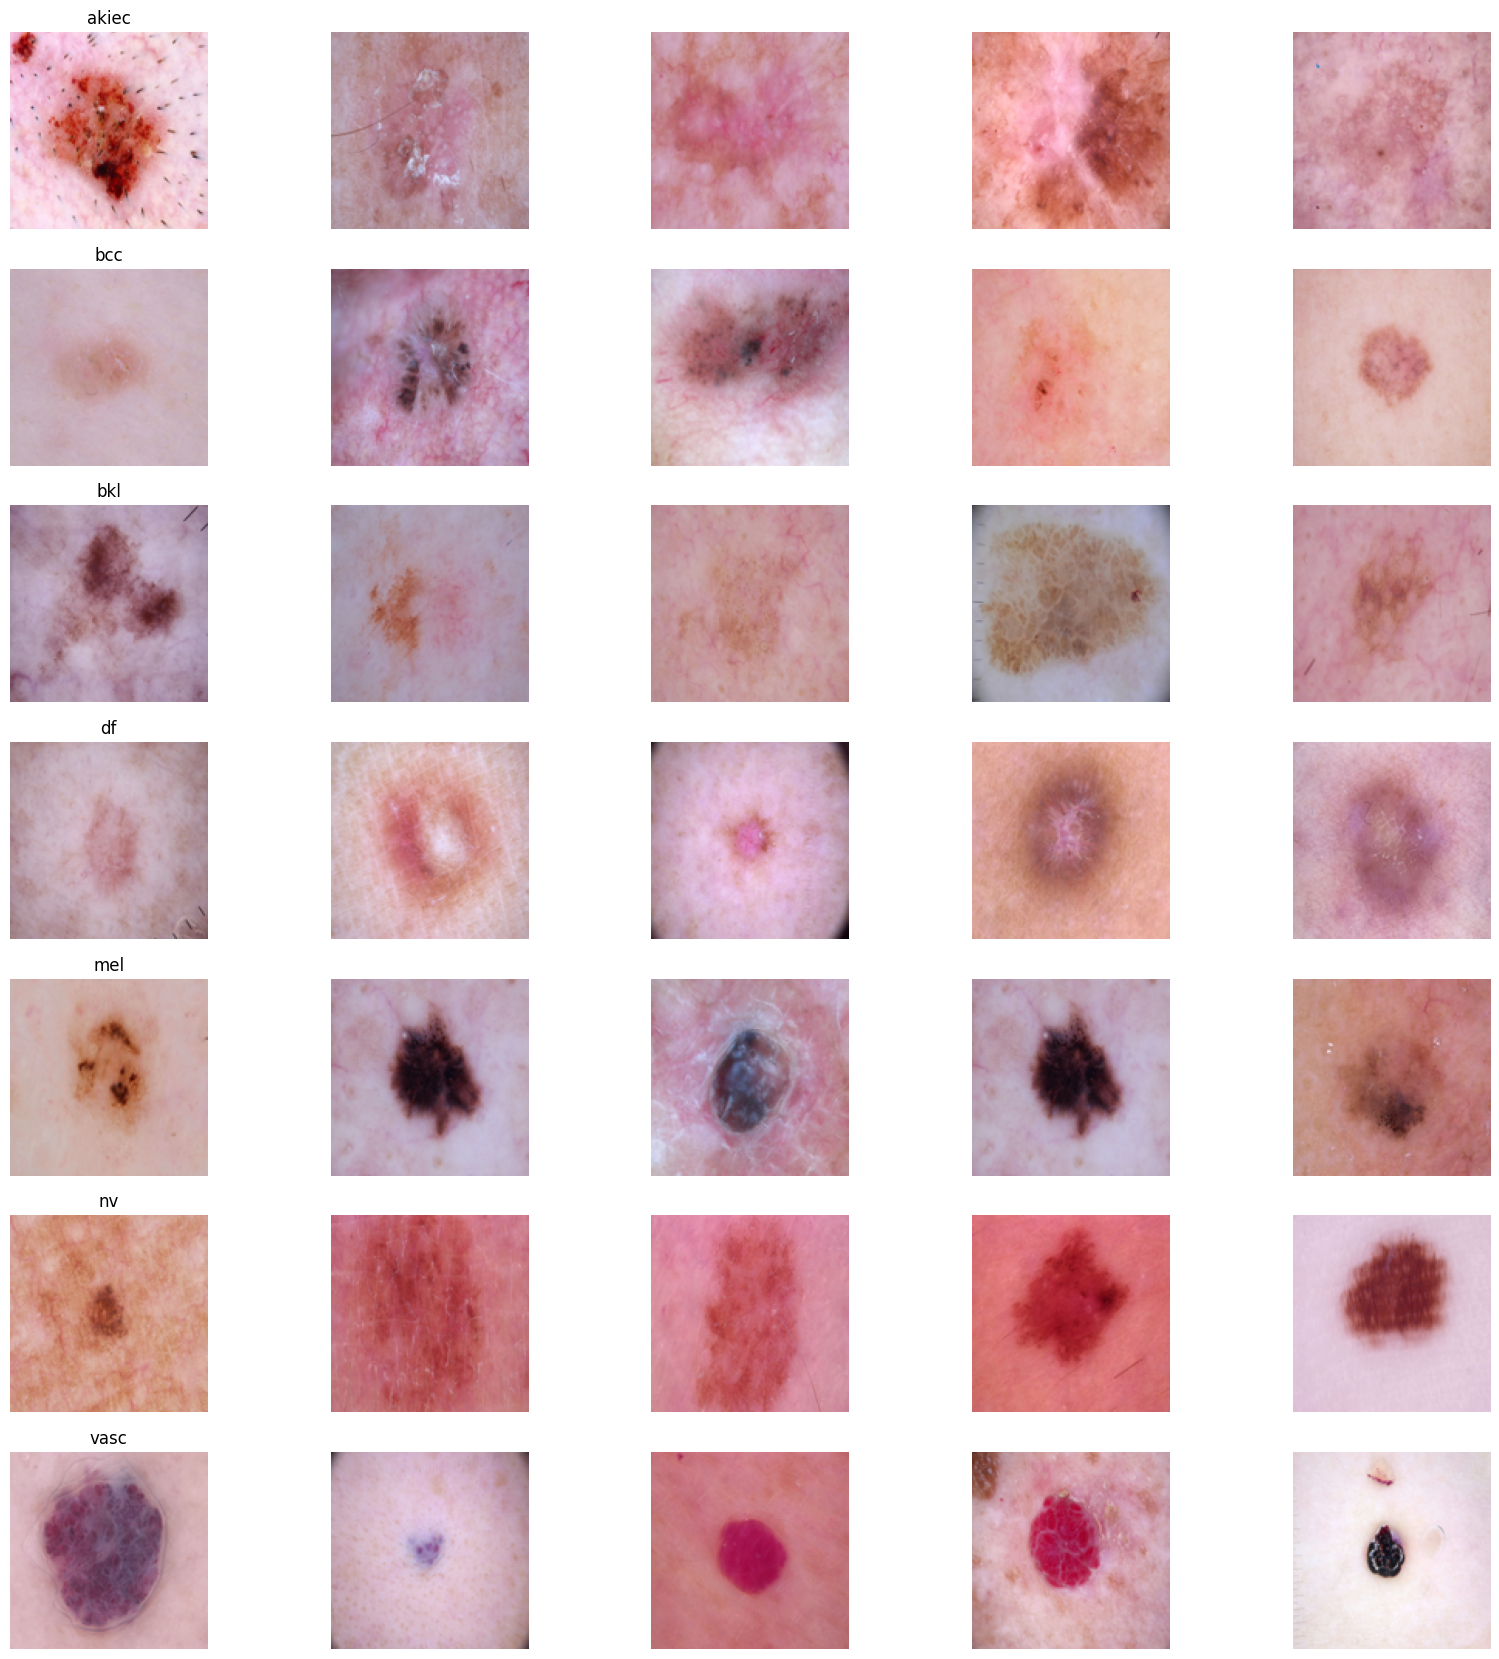

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from scipy import stats
from sklearn.preprocessing import LabelEncoder

skin_df = pd.read_csv('/content/skin_df_updated.csv')

SIZE=128

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))


# Data distribution visualization
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Check the distribution. All classes should be balanced now.
print(skin_df_balanced['label'].value_counts())


#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path1 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/HAM10000_images_part_1', '*.jpg'))}

image_path2 = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/HAM10000_images_part_2', '*.jpg'))}
image_path = {}
image_path.update(image_path1)
image_path.update(image_path2)

#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

# Model Creation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
num_classes = 7
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 256)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

Epoch 1/25
175/175 - 17s - loss: 0.4097 - accuracy: 0.1958 - val_loss: 0.4244 - val_accuracy: 0.2114 - 17s/epoch - 99ms/step
Epoch 2/25
175/175 - 8s - loss: 0.3625 - accuracy: 0.3120 - val_loss: 0.3582 - val_accuracy: 0.3954 - 8s/epoch - 46ms/step
Epoch 3/25
175/175 - 9s - loss: 0.3331 - accuracy: 0.4015 - val_loss: 0.3298 - val_accuracy: 0.4023 - 9s/epoch - 50ms/step
Epoch 4/25
175/175 - 9s - loss: 0.3054 - accuracy: 0.4640 - val_loss: 0.3122 - val_accuracy: 0.4206 - 9s/epoch - 50ms/step
Epoch 5/25
175/175 - 8s - loss: 0.2954 - accuracy: 0.5006 - val_loss: 0.3056 - val_accuracy: 0.4469 - 8s/epoch - 48ms/step
Epoch 6/25
175/175 - 8s - loss: 0.2719 - accuracy: 0.5642 - val_loss: 0.2727 - val_accuracy: 0.5497 - 8s/epoch - 47ms/step
Epoch 7/25
175/175 - 8s - loss: 0.2484 - accuracy: 0.6057 - val_loss: 0.2705 - val_accuracy: 0.5851 - 8s/epoch - 45ms/step
Epoch 8/25
175/175 - 8s - loss: 0.2336 - accuracy: 0.6312 - val_loss: 0.2687 - val_accuracy: 0.5954 - 8s/epoch - 48ms/step
Epoch 9/25
175

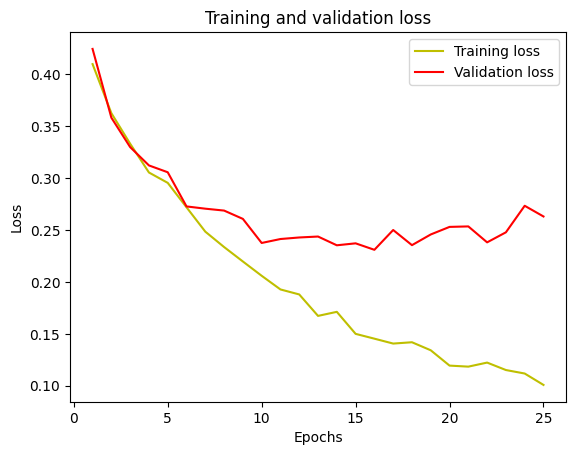

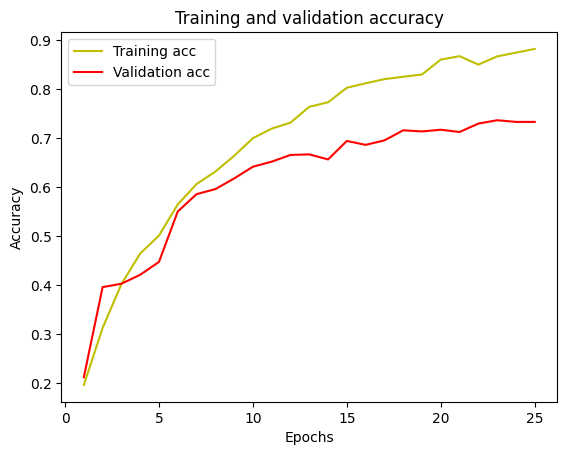

28/28 [==============================] - 1s 23ms/step


Text(45.722222222222214, 0.5, 'Fraction of incorrect predictions')

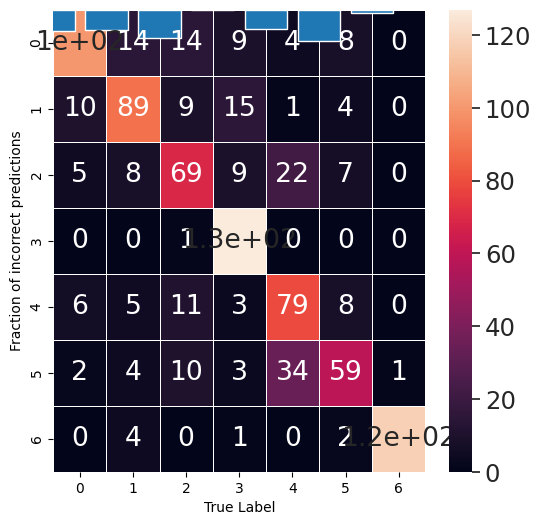

In [ ]:
batch_size = 15
epochs = 25

history = model.fit(x_train, y_train,epochs=25, batch_size =15 , validation_data=(x_test, y_test), verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/HAM10000_images_part_1/ISIC_0024306.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)

1/1 [==============================] - 0s 275ms/step
nv


# DenseNet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def conv_block(inputs, filters):
    x = layers.Conv2D(filters, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def dense_block(inputs, filters):
    x = layers.Dense(filters)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def build_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Define the model architecture
    x = conv_block(inputs, 32)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 64)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 128)
    x = layers.MaxPooling2D()(x)

    x = conv_block(x, 256)
    x = layers.MaxPooling2D()(x)

    x = layers.Flatten()(x)
    x = dense_block(x, 1024)
    x = layers.Dropout(0.5)(x)
    x = dense_block(x, 512)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create and compile the model
    model = tf.keras.Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Define the input shape and number of classes for your dataset
input_shape = (128,128, 3)
num_classes = 7

# Build the model
model = build_model(input_shape, num_classes)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496 

Epoch 1/25
110/110 - 16s - loss: 1.7465 - accuracy: 0.3935 - val_loss: 2.9448 - val_accuracy: 0.1371 - 16s/epoch - 146ms/step
Epoch 2/25
110/110 - 3s - loss: 1.3725 - accuracy: 0.5150 - val_loss: 2.6065 - val_accuracy: 0.1737 - 3s/epoch - 27ms/step
Epoch 3/25
110/110 - 3s - loss: 1.2050 - accuracy: 0.5604 - val_loss: 1.9232 - val_accuracy: 0.3520 - 3s/epoch - 27ms/step
Epoch 4/25
110/110 - 3s - loss: 1.0835 - accuracy: 0.6015 - val_loss: 1.5395 - val_accuracy: 0.4709 - 3s/epoch - 30ms/step
Epoch 5/25
110/110 - 3s - loss: 0.9020 - accuracy: 0.6667 - val_loss: 1.5638 - val_accuracy: 0.5223 - 3s/epoch - 31ms/step
Epoch 6/25
110/110 - 3s - loss: 0.7570 - accuracy: 0.7223 - val_loss: 1.2909 - val_accuracy: 0.5886 - 3s/epoch - 31ms/step
Epoch 7/25
110/110 - 3s - loss: 0.6298 - accuracy: 0.7691 - val_loss: 0.8167 - val_accuracy: 0.7143 - 3s/epoch - 29ms/step
Epoch 8/25
110/110 - 3s - loss: 0.5496 - accuracy: 0.8038 - val_loss: 1.1084 - val_accuracy: 0.6297 - 3s/epoch - 28ms/step
Epoch 9/25
11

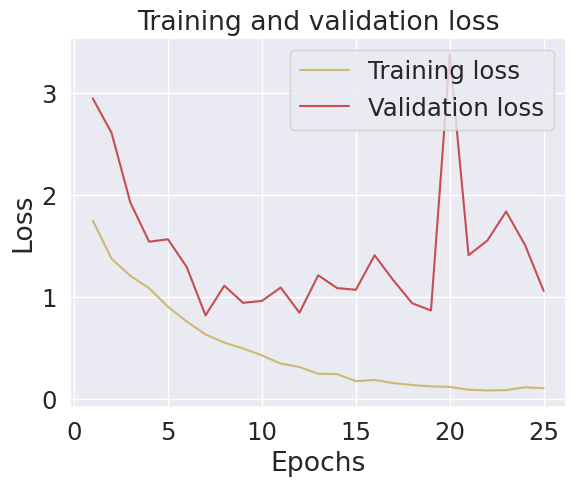

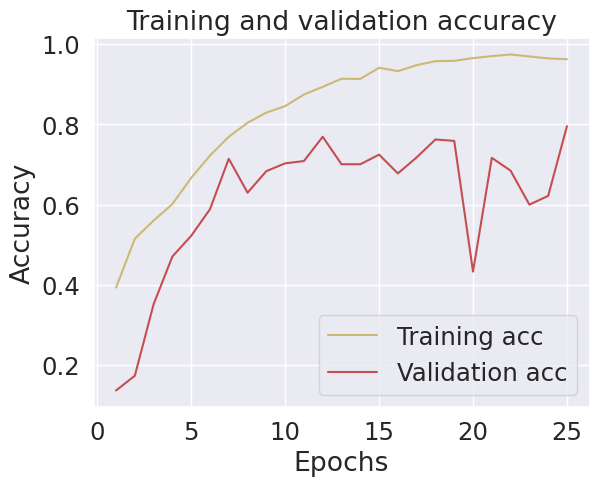

28/28 [==============================] - 1s 15ms/step


Text(32.25, 0.5, 'Fraction of incorrect predictions')

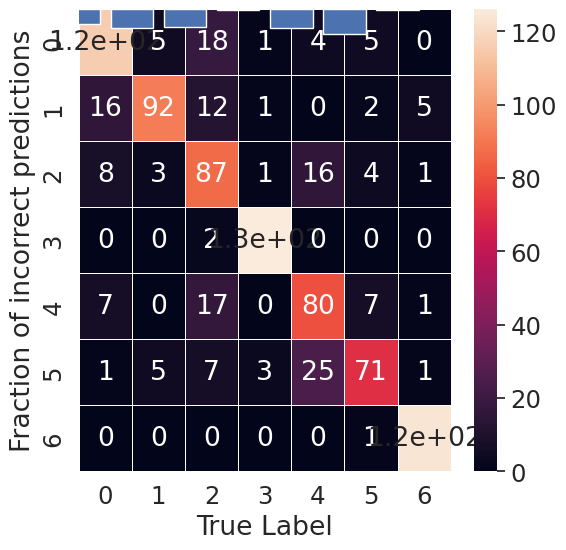

In [ ]:
batch_size = 24
epochs = 25

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/HAM10000_images_part_1/ISIC_0024306.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred_probs = model.predict(img1)
print("Predicted Probabilities:", pred_probs)
pred = np.argmax(pred_probs)

pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)


1/1 [==============================] - 0s 86ms/step
Predicted Probabilities: [[0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 70ms/step
nv


In [ ]:
# Assuming you have a DataFrame 'skin_df_balanced'
selected_labels = [6]
selected_rows = skin_df_balanced[skin_df_balanced['label'].isin(selected_labels)]

print(selected_rows[['label', 'dx']])


      label    dx
2422      6  vasc
2412      6  vasc
2334      6  vasc
2426      6  vasc
2391      6  vasc
...     ...   ...
2375      6  vasc
2436      6  vasc
2453      6  vasc
2377      6  vasc
2363      6  vasc

[500 rows x 2 columns]


# AlexNET

In [ ]:
# ALEXNET

from keras.layers import  Dropout
SIZE=128

ALEXNET = Sequential()

ALEXNET.add(Conv2D(64, kernel_size=(11, 11), activation='relu',strides=(4, 4), input_shape=(SIZE,SIZE,3)))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))

ALEXNET.add(MaxPool2D(pool_size=(3, 3),strides=(2, 2)))

ALEXNET.add(Conv2D(192, kernel_size=(5, 5),strides=(1, 1), activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(Conv2D(384, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(MaxPool2D(pool_size=(3, 3),strides=(2, 2)))

ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(2, 2),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Conv2D(256, kernel_size=(3, 3),strides=(1, 1),  activation='relu', padding='same'))
ALEXNET.add(BatchNormalization())
ALEXNET.add(Dropout(0.3))
ALEXNET.add(MaxPool2D(pool_size=(1,1),strides=(2, 2)))





ALEXNET.add(Flatten())
ALEXNET.add(Dense(4096, activation='relu'))
ALEXNET.add(Dropout(0.2))
ALEXNET.add(Dense(4096, activation='relu'))
ALEXNET.add(Dropout(0.3))
ALEXNET.add(Dense(7, activation='softmax'))

# Model Summary
ALEXNET.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 64)        23296     
                                                                 
 batch_normalization_6 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 192)       307392    
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 192)      

In [ ]:
SIZE = 128
epochs = 50
batch_size = 8
LearningR=0.000003
n_samples = 500
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=LearningR, beta_1=0.9, beta_2=0.999,amsgrad=False)
ALEXNET.compile(optimizer=optimizer,loss="categorical_crossentropy", metrics=["accuracy"])
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.0001)
x_train, x_validate, y_train, y_validate = train_test_split(x_test, y_test, test_size=0.1, random_state=2)


Epoch 1/50
98/98 [==============================] - ETA: 0s - loss: 2.0607 - accuracy: 0.1438

98/98 [==============================] - 16s 101ms/step - loss: 2.0607 - accuracy: 0.1438 - val_loss: 1.9449 - val_accuracy: 0.1591 - lr: 3.0000e-06
Epoch 2/50
98/98 [==============================] - ETA: 0s - loss: 2.0402 - accuracy: 0.1386

98/98 [==============================] - 5s 55ms/step - loss: 2.0402 - accuracy: 0.1386 - val_loss: 1.9479 - val_accuracy: 0.1477 - lr: 3.0000e-06
Epoch 3/50
98/98 [==============================] - ETA: 0s - loss: 1.9743 - accuracy: 0.1836

98/98 [==============================] - 5s 46ms/step - loss: 1.9743 - accuracy: 0.1836 - val_loss: 1.9461 - val_accuracy: 0.1591 - lr: 3.0000e-06
Epoch 4/50
98/98 [==============================] - ETA: 0s - loss: 1.9692 - accuracy: 0.1656

98/98 [==============================] - 8s 78ms/step - loss: 1.9692 - accuracy: 0.1656 - val_loss: 1.9586 - val_accuracy: 0.1136 - lr: 3.0000e-06
Epoch 5/50
97/98 [============================>.] - ETA: 0s - loss: 1.9143 - accuracy: 0.2218

98/98 [==============================] - 5s 52ms/step - loss: 1.9108 - accuracy: 0.2221 - val_loss: 1.9241 - val_accuracy: 0.1818 - lr: 3.0000e-06
Epoch 6/50
98/98 [==============================] - ETA: 0s - loss: 1.9119 - accuracy: 0.2285

98/98 [==============================] - 4s 39ms/step - loss: 1.9119 - accuracy: 0.2285 - val_loss: 1.8316 - val_accuracy: 0.2727 - lr: 3.0000e-06
Epoch 7/50
98/98 [==============================] - ETA: 0s - loss: 1.8944 - accuracy: 0.2234

98/98 [==============================] - 5s 54ms/step - loss: 1.8944 - accuracy: 0.2234 - val_loss: 1.7655 - val_accuracy: 0.2955 - lr: 3.0000e-06
Epoch 8/50
98/98 [==============================] - ETA: 0s - loss: 1.8653 - accuracy: 0.2259

98/98 [==============================] - 8s 81ms/step - loss: 1.8653 - accuracy: 0.2259 - val_loss: 1.7028 - val_accuracy: 0.3068 - lr: 3.0000e-06
Epoch 9/50
98/98 [==============================] - ETA: 0s - loss: 1.8755 - accuracy: 0.2388

98/98 [==============================] - 6s 57ms/step - loss: 1.8755 - accuracy: 0.2388 - val_loss: 1.6628 - val_accuracy: 0.4091 - lr: 3.0000e-06
Epoch 10/50
98/98 [==============================] - ETA: 0s - loss: 1.7908 - accuracy: 0.2760

98/98 [==============================] - 8s 78ms/step - loss: 1.7908 - accuracy: 0.2760 - val_loss: 1.6529 - val_accuracy: 0.3636 - lr: 3.0000e-06
Epoch 11/50
97/98 [============================>.] - ETA: 0s - loss: 1.8184 - accuracy: 0.2685

98/98 [==============================] - 7s 73ms/step - loss: 1.8188 - accuracy: 0.2670 - val_loss: 1.6313 - val_accuracy: 0.3750 - lr: 3.0000e-06
Epoch 12/50
98/98 [==============================] - ETA: 0s - loss: 1.8218 - accuracy: 0.2786

98/98 [==============================] - 4s 41ms/step - loss: 1.8218 - accuracy: 0.2786 - val_loss: 1.6324 - val_accuracy: 0.3409 - lr: 3.0000e-06
Epoch 13/50
98/98 [==============================] - ETA: 0s - loss: 1.7484 - accuracy: 0.2901

98/98 [==============================] - 7s 76ms/step - loss: 1.7484 - accuracy: 0.2901 - val_loss: 1.6124 - val_accuracy: 0.3750 - lr: 3.0000e-06
Epoch 14/50
98/98 [==============================] - ETA: 0s - loss: 1.7981 - accuracy: 0.2721

98/98 [==============================] - 5s 51ms/step - loss: 1.7981 - accuracy: 0.2721 - val_loss: 1.5938 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 15/50
98/98 [==============================] - ETA: 0s - loss: 1.7438 - accuracy: 0.2978

98/98 [==============================] - 4s 40ms/step - loss: 1.7438 - accuracy: 0.2978 - val_loss: 1.5713 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 16/50
98/98 [==============================] - ETA: 0s - loss: 1.7305 - accuracy: 0.3158

98/98 [==============================] - 4s 43ms/step - loss: 1.7305 - accuracy: 0.3158 - val_loss: 1.5605 - val_accuracy: 0.3636 - lr: 3.0000e-06
Epoch 17/50
98/98 [==============================] - ETA: 0s - loss: 1.7549 - accuracy: 0.2850

98/98 [==============================] - 8s 78ms/step - loss: 1.7549 - accuracy: 0.2850 - val_loss: 1.5463 - val_accuracy: 0.3636 - lr: 3.0000e-06
Epoch 18/50
97/98 [============================>.] - ETA: 0s - loss: 1.7070 - accuracy: 0.3359

98/98 [==============================] - 5s 52ms/step - loss: 1.7018 - accuracy: 0.3389 - val_loss: 1.5415 - val_accuracy: 0.3864 - lr: 3.0000e-06
Epoch 19/50
97/98 [============================>.] - ETA: 0s - loss: 1.7428 - accuracy: 0.2944

98/98 [==============================] - 4s 40ms/step - loss: 1.7445 - accuracy: 0.2940 - val_loss: 1.5148 - val_accuracy: 0.4091 - lr: 3.0000e-06
Epoch 20/50
98/98 [==============================] - ETA: 0s - loss: 1.7005 - accuracy: 0.3196

98/98 [==============================] - 5s 55ms/step - loss: 1.7005 - accuracy: 0.3196 - val_loss: 1.5156 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 21/50
97/98 [============================>.] - ETA: 0s - loss: 1.6923 - accuracy: 0.3541

98/98 [==============================] - 5s 49ms/step - loss: 1.6939 - accuracy: 0.3530 - val_loss: 1.5234 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 22/50
98/98 [==============================] - ETA: 0s - loss: 1.6902 - accuracy: 0.3376

98/98 [==============================] - 6s 64ms/step - loss: 1.6902 - accuracy: 0.3376 - val_loss: 1.5053 - val_accuracy: 0.4318 - lr: 3.0000e-06
Epoch 23/50
98/98 [==============================] - ETA: 0s - loss: 1.6816 - accuracy: 0.3325

98/98 [==============================] - 8s 85ms/step - loss: 1.6816 - accuracy: 0.3325 - val_loss: 1.4959 - val_accuracy: 0.4545 - lr: 3.0000e-06
Epoch 24/50
97/98 [============================>.] - ETA: 0s - loss: 1.6508 - accuracy: 0.3489

98/98 [==============================] - 5s 52ms/step - loss: 1.6504 - accuracy: 0.3504 - val_loss: 1.4778 - val_accuracy: 0.4659 - lr: 3.0000e-06
Epoch 25/50
98/98 [==============================] - ETA: 0s - loss: 1.6381 - accuracy: 0.3607

98/98 [==============================] - 5s 51ms/step - loss: 1.6381 - accuracy: 0.3607 - val_loss: 1.4816 - val_accuracy: 0.3864 - lr: 3.0000e-06
Epoch 26/50
98/98 [==============================] - ETA: 0s - loss: 1.6304 - accuracy: 0.3710

98/98 [==============================] - 8s 78ms/step - loss: 1.6304 - accuracy: 0.3710 - val_loss: 1.4583 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 27/50
97/98 [============================>.] - ETA: 0s - loss: 1.6256 - accuracy: 0.3528

98/98 [==============================] - 4s 39ms/step - loss: 1.6256 - accuracy: 0.3504 - val_loss: 1.4249 - val_accuracy: 0.4432 - lr: 3.0000e-06
Epoch 28/50
97/98 [============================>.] - ETA: 0s - loss: 1.6275 - accuracy: 0.3619

98/98 [==============================] - 4s 38ms/step - loss: 1.6261 - accuracy: 0.3633 - val_loss: 1.4287 - val_accuracy: 0.4318 - lr: 3.0000e-06
Epoch 29/50
98/98 [==============================] - ETA: 0s - loss: 1.6371 - accuracy: 0.3530

98/98 [==============================] - 7s 74ms/step - loss: 1.6371 - accuracy: 0.3530 - val_loss: 1.4341 - val_accuracy: 0.4091 - lr: 3.0000e-06
Epoch 30/50
97/98 [============================>.] - ETA: 0s - loss: 1.5754 - accuracy: 0.3761

98/98 [==============================] - 6s 64ms/step - loss: 1.5743 - accuracy: 0.3774 - val_loss: 1.4302 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 31/50
97/98 [============================>.] - ETA: 0s - loss: 1.6040 - accuracy: 0.3787

98/98 [==============================] - 4s 39ms/step - loss: 1.6069 - accuracy: 0.3774 - val_loss: 1.4314 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 32/50
98/98 [==============================] - ETA: 0s - loss: 1.5586 - accuracy: 0.3890

98/98 [==============================] - 8s 78ms/step - loss: 1.5586 - accuracy: 0.3890 - val_loss: 1.4161 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 33/50
98/98 [==============================] - ETA: 0s - loss: 1.5817 - accuracy: 0.3710

98/98 [==============================] - 4s 41ms/step - loss: 1.5817 - accuracy: 0.3710 - val_loss: 1.4308 - val_accuracy: 0.4318 - lr: 3.0000e-06
Epoch 34/50
97/98 [============================>.] - ETA: 0s - loss: 1.5780 - accuracy: 0.3891

98/98 [==============================] - 4s 39ms/step - loss: 1.5813 - accuracy: 0.3877 - val_loss: 1.4134 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 35/50
98/98 [==============================] - ETA: 0s - loss: 1.5742 - accuracy: 0.3979

98/98 [==============================] - 6s 60ms/step - loss: 1.5742 - accuracy: 0.3979 - val_loss: 1.4212 - val_accuracy: 0.4091 - lr: 3.0000e-06
Epoch 36/50
98/98 [==============================] - ETA: 0s - loss: 1.5580 - accuracy: 0.3761

98/98 [==============================] - 8s 82ms/step - loss: 1.5580 - accuracy: 0.3761 - val_loss: 1.4105 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 37/50
97/98 [============================>.] - ETA: 0s - loss: 1.5317 - accuracy: 0.4112

98/98 [==============================] - 4s 40ms/step - loss: 1.5326 - accuracy: 0.4082 - val_loss: 1.3930 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 38/50
97/98 [============================>.] - ETA: 0s - loss: 1.5104 - accuracy: 0.4202

98/98 [==============================] - 4s 39ms/step - loss: 1.5105 - accuracy: 0.4211 - val_loss: 1.4665 - val_accuracy: 0.4318 - lr: 3.0000e-06
Epoch 39/50
98/98 [==============================] - ETA: 0s - loss: 1.5282 - accuracy: 0.4082

98/98 [==============================] - 7s 75ms/step - loss: 1.5282 - accuracy: 0.4082 - val_loss: 1.4000 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 40/50
97/98 [============================>.] - ETA: 0s - loss: 1.5337 - accuracy: 0.3943

98/98 [==============================] - 7s 68ms/step - loss: 1.5311 - accuracy: 0.3967 - val_loss: 1.3608 - val_accuracy: 0.4545 - lr: 3.0000e-06
Epoch 41/50
97/98 [============================>.] - ETA: 0s - loss: 1.5271 - accuracy: 0.4099

98/98 [==============================] - 4s 41ms/step - loss: 1.5239 - accuracy: 0.4121 - val_loss: 1.3894 - val_accuracy: 0.4205 - lr: 3.0000e-06
Epoch 42/50
98/98 [==============================] - ETA: 0s - loss: 1.5116 - accuracy: 0.4095

98/98 [==============================] - 4s 39ms/step - loss: 1.5116 - accuracy: 0.4095 - val_loss: 1.3752 - val_accuracy: 0.4091 - lr: 3.0000e-06
Epoch 43/50
98/98 [==============================] - ETA: 0s - loss: 1.5097 - accuracy: 0.4223

98/98 [==============================] - 6s 66ms/step - loss: 1.5097 - accuracy: 0.4223 - val_loss: 1.3961 - val_accuracy: 0.4773 - lr: 3.0000e-06
Epoch 44/50
98/98 [==============================] - ETA: 0s - loss: 1.5352 - accuracy: 0.3967

98/98 [==============================] - 7s 75ms/step - loss: 1.5352 - accuracy: 0.3967 - val_loss: 1.4166 - val_accuracy: 0.4432 - lr: 3.0000e-06
Epoch 45/50
97/98 [============================>.] - ETA: 0s - loss: 1.5014 - accuracy: 0.4293

98/98 [==============================] - 4s 41ms/step - loss: 1.5047 - accuracy: 0.4275 - val_loss: 1.3592 - val_accuracy: 0.4432 - lr: 3.0000e-06
Epoch 46/50
98/98 [==============================] - ETA: 0s - loss: 1.4448 - accuracy: 0.4352

98/98 [==============================] - 5s 49ms/step - loss: 1.4448 - accuracy: 0.4352 - val_loss: 1.3260 - val_accuracy: 0.3977 - lr: 3.0000e-06
Epoch 47/50
98/98 [==============================] - ETA: 0s - loss: 1.5013 - accuracy: 0.4416

98/98 [==============================] - 8s 78ms/step - loss: 1.5013 - accuracy: 0.4416 - val_loss: 1.2998 - val_accuracy: 0.4659 - lr: 3.0000e-06
Epoch 48/50
98/98 [==============================] - ETA: 0s - loss: 1.4746 - accuracy: 0.4288

98/98 [==============================] - 4s 40ms/step - loss: 1.4746 - accuracy: 0.4288 - val_loss: 1.2983 - val_accuracy: 0.4659 - lr: 3.0000e-06
Epoch 49/50
97/98 [============================>.] - ETA: 0s - loss: 1.4938 - accuracy: 0.4254

98/98 [==============================] - 4s 40ms/step - loss: 1.4893 - accuracy: 0.4288 - val_loss: 1.4116 - val_accuracy: 0.4773 - lr: 3.0000e-06
Epoch 50/50
98/98 [==============================] - ETA: 0s - loss: 1.4853 - accuracy: 0.4134

3/3 [==============================] - 0s 10ms/step - loss: 1.2967 - accuracy: 0.5000
Validation: accuracy = 0.500000  ;  loss_v = 1.296652
Test: accuracy = 0.540571  ;  loss = 1.265111


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NameError: name 'accuracy_lr_loss_plot' is not defined

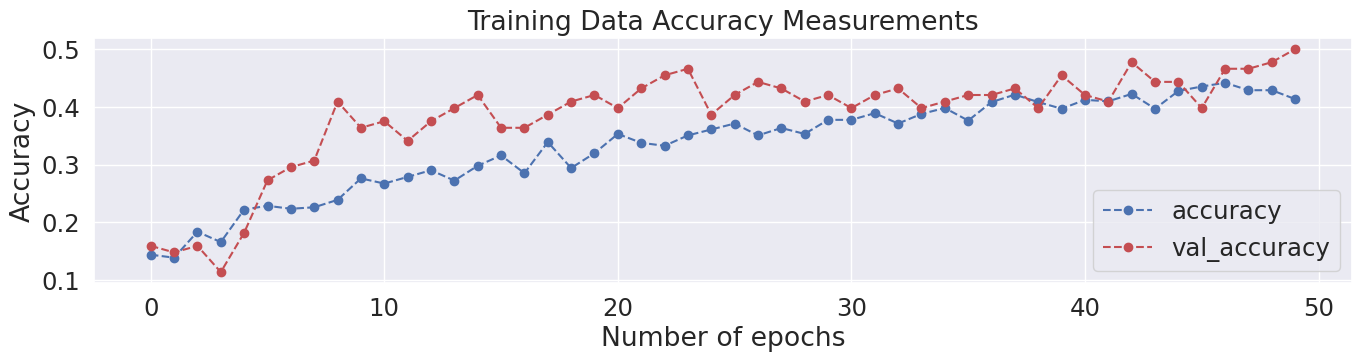

In [ ]:
# Fit the model
# With data augmentation to prevent overfitting

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    # randomly rotate images in the range (degrees, 0 to 180)
    rotation_range=20,
    zoom_range=0.2,  # Randomly zoom image
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.2,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.2,
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

history = ALEXNET.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                epochs=epochs, validation_data=(x_validate, y_validate),verbose=1, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction])
Y_pred = ALEXNET.predict(x_validate)

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate, axis=1)

loss, accuracy = ALEXNET.evaluate(x_test, y_test, verbose=1)

loss_v, accuracy_v = ALEXNET.evaluate(x_validate, y_validate, verbose=1)

print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
ALEXNET.save("ALEXNET01.h5")

def accuracyPlot(history):
    fig = plt.figure(figsize=(14,4))

    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
accuracyPlot(history)

accuracy_lr_loss_plot(history)

# plot accuracy and loss Function
def accuracy_lr_loss_plot (history):
    fig = plt.figure(figsize=(14,9))

    plt.subplot(231)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(232)
    plt.plot(history.history['lr'], 'go--', label="Learning Rate")
    plt.title("Learning Rate")
    plt.xlabel("Number of epochs")
    plt.ylabel("Learning Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(233)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

accuracy_lr_loss_plot(history)

In [ ]:
# plot accuracy and loss Function
def accuracy_lr_loss_plot (history):
    fig = plt.figure(figsize=(14,9))

    plt.subplot(231)
    plt.plot(history.history["accuracy"], 'bo--', label="accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label="val_accuracy")
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(232)
    plt.plot(history.history['lr'], 'go--', label="Learning Rate")
    plt.title("Learning Rate")
    plt.xlabel("Number of epochs")
    plt.ylabel("Learning Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.subplot(233)
    plt.plot(history.history["loss"], "bo--", label="loss")
    plt.plot(history.history["val_loss"], "ro--", label = "val_loss")
    plt.title("Training Data Loss")
    plt.xlabel("Number of epochs")
    plt.ylabel("loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    plt.show()

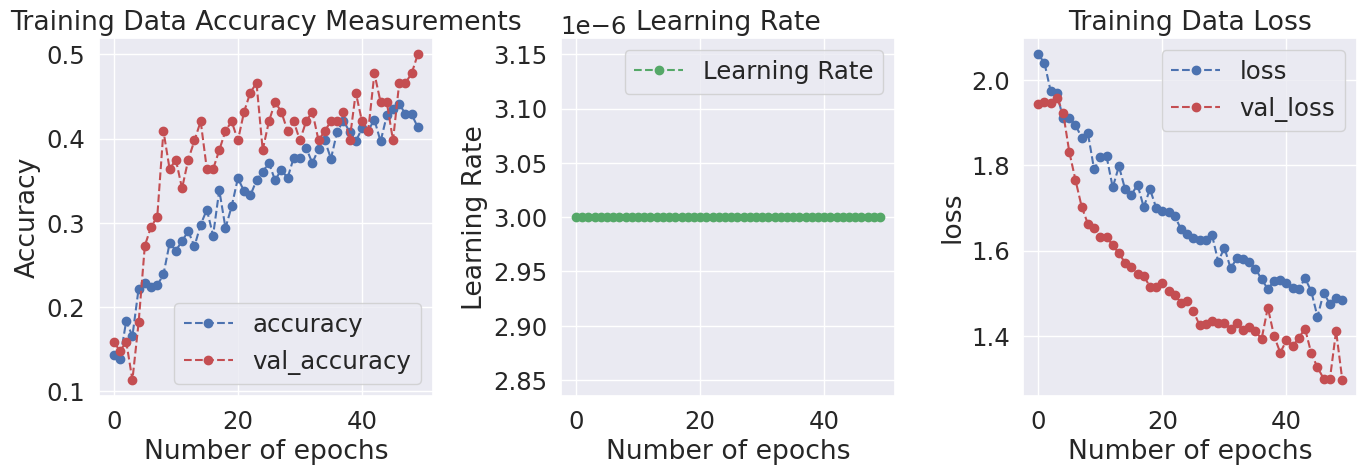

In [ ]:
accuracy_lr_loss_plot(history)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/HAM10000_images_part_1/ISIC_0024306.jpg',target_size=(128,128))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred_probs = model.predict(img1)
print("Predicted Probabilities:", pred_probs)
pred = np.argmax(pred_probs)

pred = np.argmax(model.predict(img1))
def printRes(pred):
    if pred == 0:
        return 'akiec'
    elif pred == 1:
        return 'bcc'
    elif pred == 2:
        return 'bkl'
    elif pred == 3:
        return 'df'
    elif pred == 4:
        return 'mel'
    elif pred == 5:
        return 'nv'
    elif pred == 6:
        return 'vasc'

# Assuming 'pred' is the prediction value
result = printRes(pred)
print(result)

1/1 [==============================] - 0s 28ms/step
Predicted Probabilities: [[0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 32ms/step
nv
